In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

### 1, EDA Exploratroy data analysis

In [2]:
# load dataset
df_rental = pd.read_csv("rental_info.csv")
df_rental.head()

,rental_date,return_date,amount,release_year,rental_rate,length,replacement_cost,special_features,NC-17,PG,PG-13,R,amount_2,length_2,rental_rate_2
0,2005-05-25 02:54:33+00:00,2005-05-28 23:40:33+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
1,2005-06-15 23:19:16+00:00,2005-06-18 19:24:16+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
2,2005-07-10 04:27:45+00:00,2005-07-17 10:11:45+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
3,2005-07-31 12:06:41+00:00,2005-08-02 14:30:41+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
4,2005-08-19 12:30:04+00:00,2005-08-23 13:35:04+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401


In [8]:
#  check data size and shape
df_rental.shape

(15861, 15)

In [3]:
# check data type
df_rental.dtypes

rental_date          object
return_date          object
amount              float64
release_year        float64
rental_rate         float64
length              float64
replacement_cost    float64
special_features     object
NC-17                 int64
PG                    int64
PG-13                 int64
R                     int64
amount_2            float64
length_2            float64
rental_rate_2       float64
dtype: object

In [4]:
# change data type: rental date and return date should be datetime type
df_rental['rental_date'] = pd.to_datetime(df_rental['rental_date'])
df_rental['return_date'] = pd.to_datetime(df_rental['return_date'])

In [9]:
# check missing values 
df_rental.isna().sum()

rental_date         0
return_date         0
amount              0
release_year        0
rental_rate         0
length              0
replacement_cost    0
special_features    0
NC-17               0
PG                  0
PG-13               0
R                   0
amount_2            0
length_2            0
rental_rate_2       0
dtype: int64

In [11]:
# check duplicated values 
df_rental.duplicated().sum()

0

In [13]:
# check numerical values 
df_rental.describe()

# no special outliers 

,amount,release_year,rental_rate,length,replacement_cost,NC-17,PG,PG-13,R,amount_2,length_2,rental_rate_2
count,15861.000000,15861.000000,15861.000000,15861.000000,15861.000000,15861.000000,15861.000000,15861.000000,15861.000000,15861.000000,15861.000000,15861.000000
mean,4.217161,2006.885379,2.944101,114.994578,20.224727,0.204842,0.200303,0.223378,0.198726,23.355504,14832.841876,11.389287
std,2.360383,2.025027,1.649766,40.114715,6.083784,0.403599,0.400239,0.416523,0.399054,23.503164,9393.431996,10.005293
min,0.990000,2004.000000,0.990000,46.000000,9.990000,0.000000,0.000000,0.000000,0.000000,0.980100,2116.000000,0.980100
25%,2.990000,2005.000000,0.990000,81.000000,14.990000,0.000000,0.000000,0.000000,0.000000,8.940100,6561.000000,0.980100
50%,3.990000,2007.000000,2.990000,114.000000,20.990000,0.000000,0.000000,0.000000,0.000000,15.920100,12996.000000,8.940100
75%,4.990000,2009.000000,4.990000,148.000000,25.990000,0.000000,0.000000,0.000000,0.000000,24.900100,21904.000000,24.900100
max,11.990000,2010.000000,4.990000,185.000000,29.990000,1.000000,1.000000,1.000000,1.000000,143.760100,34225.000000,24.900100


### 2, Data visualisation
check the distribution of numerical values

<Axes: xlabel='amount', ylabel='Count'>

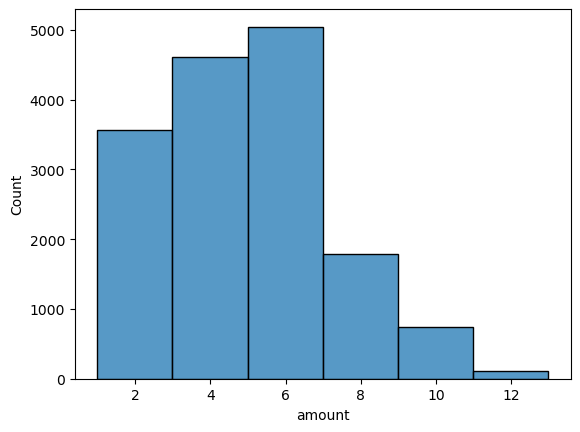

In [16]:
# check the distribution of amount
sns.histplot(data=df_rental, x='amount', binwidth=2)

<Axes: xlabel='length', ylabel='Count'>

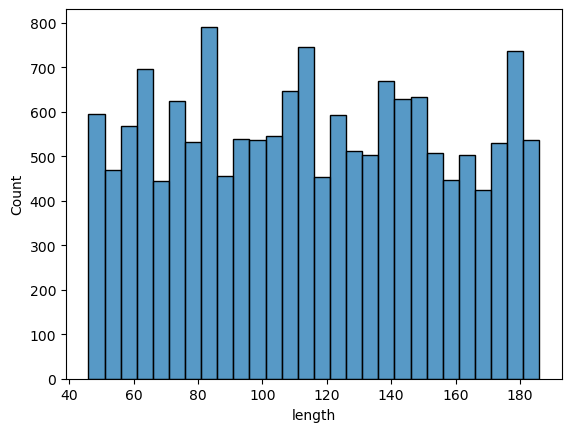

In [18]:
# check the distribution of length
sns.histplot(data=df_rental, x='length', binwidth=5)

In [21]:
# check rental year month 
df_rental.groupby(df_rental['rental_date'].dt.month)[['amount', 'length']].mean()

,amount,length
rental_date,,
5,4.176515,115.105079
6,4.165054,114.992258
7,4.232883,114.967293
8,4.228169,115.004836


### 3, Define the problem and make hypothesis
Our problem is to predit how many days a customer would rent a DVD <br>

**Hypothesis** <br>

1, amout may affect the rental days, if it's expensive then customer may rent for less days <br>
2, film length : longer film may need longer time to watch it <br>
3, rental_rate : this shows the popularity of the movie. customer may like it more and spend more time on it <br>
4, special features : customer may spend more time on special features <br>

Every hypothsis is a feature, we are going to test then one by one


### 4, Feature engineering

##### 1) Check the relationship between label and numerical values

In [22]:
# create lable : the rental duration days 
df_rental['rental_duration'] = df_rental['return_date'] - df_rental['rental_date']
df_rental['rental_duration_days'] = df_rental['rental_duration'].dt.days

<Axes: xlabel='amount', ylabel='rental_duration_days'>

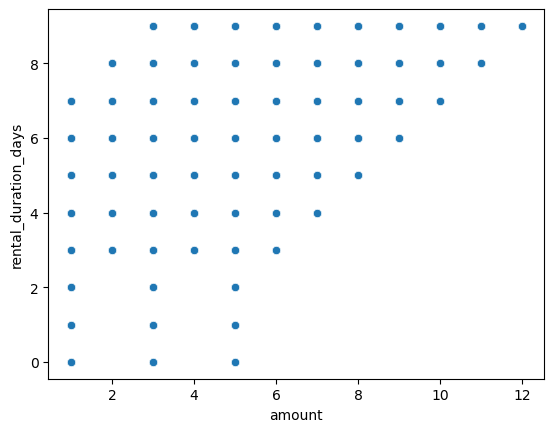

In [28]:
# check relationship between amount and rental days
sns.scatterplot(data= df_rental, x='amount', y='rental_duration_days')

<Axes: xlabel='length', ylabel='rental_duration_days'>

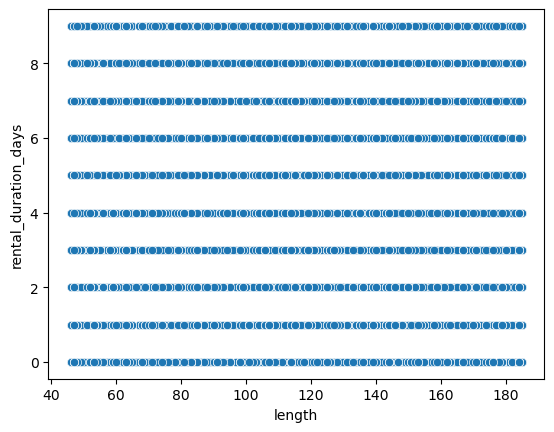

In [40]:
# check relationship between length and rental days
sns.scatterplot(data= df_rental, x='length', y='rental_duration_days')

<Axes: xlabel='rental_rate', ylabel='rental_duration_days'>

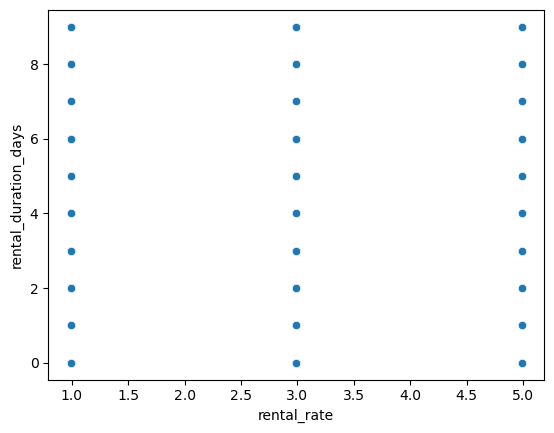

In [41]:
# check relationship between rental rate and rental days
sns.scatterplot(data= df_rental, x='rental_rate', y='rental_duration_days')

According to the graph, no obvious pattens were detected

##### 2) Transform non numerical values
special features need to be transform into dummy values so it can fit into models

In [42]:
# explore special features
df_rental['special_features'].unique()

array(['{Trailers,"Behind the Scenes"}', '{Trailers}',
       '{Commentaries,"Behind the Scenes"}', '{Trailers,Commentaries}',
       '{"Deleted Scenes","Behind the Scenes"}',
       '{Commentaries,"Deleted Scenes","Behind the Scenes"}',
       '{Trailers,Commentaries,"Deleted Scenes"}',
       '{"Behind the Scenes"}',
       '{Trailers,"Deleted Scenes","Behind the Scenes"}',
       '{Commentaries,"Deleted Scenes"}', '{Commentaries}',
       '{Trailers,Commentaries,"Behind the Scenes"}',
       '{Trailers,"Deleted Scenes"}', '{"Deleted Scenes"}',
       '{Trailers,Commentaries,"Deleted Scenes","Behind the Scenes"}'],
      dtype=object)

In [38]:
# check relationship between label and different fetures
corr_matrix = df_rental.drop(columns = ['special_features', 'rental_date','return_date','rental_duration' ]).corr()
corr_matrix['rental_duration_days'].sort_values(ascending = False)

rental_duration_days    1.000000
amount                  0.551593
amount_2                0.549412
replacement_cost        0.015684
PG-13                   0.010201
release_year            0.007044
NC-17                   0.000783
rental_rate            -0.001060
rental_rate_2          -0.001258
length                 -0.004547
length_2               -0.004792
R                      -0.007961
PG                     -0.008066
Name: rental_duration_days, dtype: float64

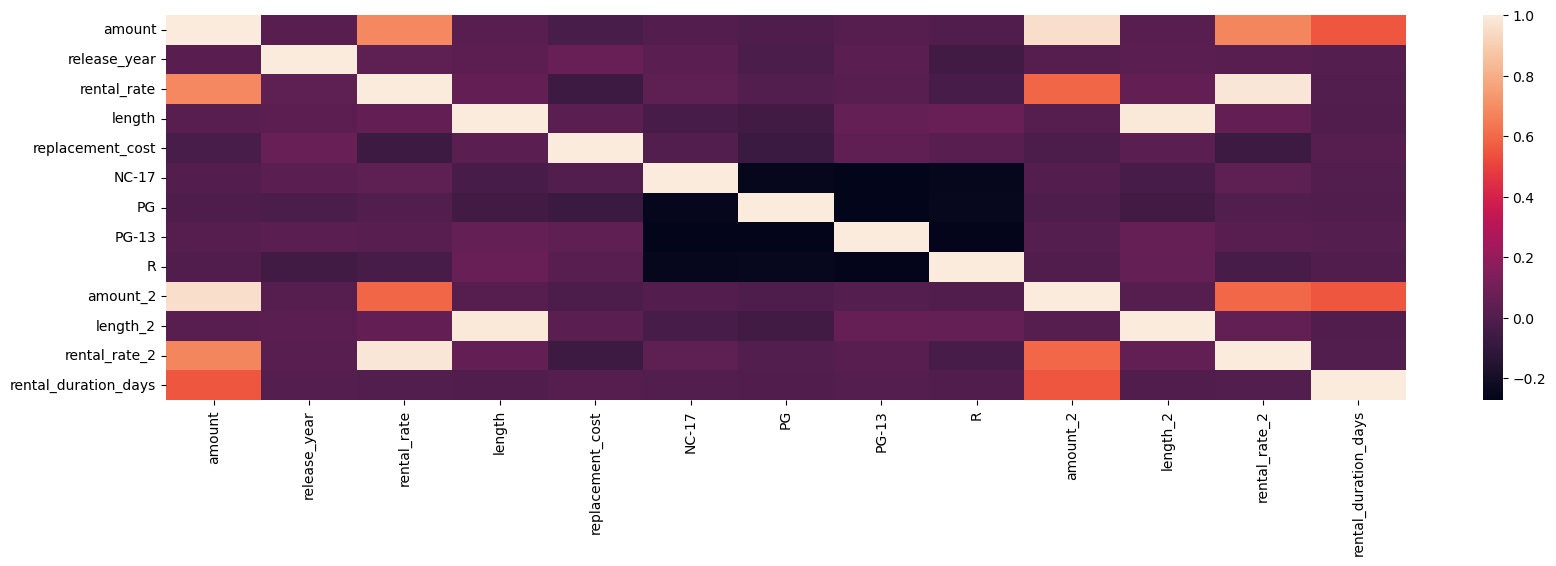

In [39]:
plt.figure(figsize=(20,5))
sns.heatmap(corr_matrix)
plt.show()